<a href="https://colab.research.google.com/github/Maurodj78/EntregaFinalCienciaDeDatos-/blob/main/EntregaFinal_Mauro_Alonzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Entrega Final**
# Nombre del Alumno: Mauro Alonzi

**Datasets:** `ventas.csv`, `clientes.csv`, `marketing.csv`.




<a id="etapa-4"></a>

# **Entrega Final**

**Datasets:** `ventas.csv`, `clientes.csv`, `marketing.csv` (en Drive).

### Mapeo a la rúbrica
###Etapa 1: Recopilación y Preparación de Datos
1. 1-Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.
4. 4-Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.
5. 5-Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.
###Etapa 2: Preprocesamiento y Limpieza de Datos
1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.
2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.
3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.
4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
###Etapa 3: Análisis de Datos
1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.
2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.
3. Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.
###Etapa 4: Visualización de Datos
1. Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión)
2. Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.
4. Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.



## 1) Entorno y **carga de datos**

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
datos_ventas = '/content/drive/MyDrive/Proyecto_Datos/ventas.csv'
df_ventas = pd.read_csv(datos_ventas)
datos_marketing = '/content/drive/MyDrive/Proyecto_Datos/marketing.csv'
df_marketing = pd.read_csv(datos_marketing)
datos_clientes = '/content/drive/MyDrive/Proyecto_Datos/clientes.csv'
df_clientes = pd.read_csv(datos_clientes)

print("df_ventas.shape ->", df_ventas.shape)
print("df_marketing.shape ->", df_marketing.shape)
print("df_clientes.shape ->", df_clientes.shape)

display(df_ventas.head(3))
display(df_marketing.head(3))
display(df_clientes.head(3))


df_ventas.shape -> (3035, 6)
df_marketing.shape -> (90, 6)
df_clientes.shape -> (567, 5)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


## 4) **Exploración inicial con pandas** (EDA)

In [5]:

def eda(df, nombre):
    print(f"========== ANALISIS EXPLORATORIO: {nombre.upper()} ==========")
    print("\n1. FORMA Y TAMAÑO (SHAPE):", df.shape)
    print("\n2. TIPOS DE DATOS (DTYPES):")
    display(df.dtypes)
    print("\n3. VALORES UNICOS POR COLUMNA (NUNIQUE):")
    display(df.nunique())
    print("\n4. CONTEO DE VALORES NULOS (ISNA):")
    nulos_abs = df.isna().sum()
    nulos_pct = (nulos_abs / df.shape[0]) * 100
    df_nulos = pd.DataFrame({
        'Nulos (Absoluto)': nulos_abs,
        'Nulos (Porcentaje) %': nulos_pct.round(2)
    })
    display(df_nulos[df_nulos['Nulos (Absoluto)'] > 0])
    print("\n5. FILAS DUPLICADAS:")
    print(f"Total de filas completamente duplicadas: {df.duplicated().sum()}")
    print("\n6. VISTA PREVIA (HEAD):")
    display(df.head(5))
    print("\n7. VISTA FINAL (TAIL):")
    display(df.tail(5))
    print("\n8. RESUMEN ESTADÍSTICO (NUMÉRICO):")
    display(df.describe(include='number').round(2))
    print("\n9. RESUMEN ESTADÍSTICO (CATEGÓRICO/TEXTO):")
    display(df.describe(include='object'))
    print("=" * (70 + len(nombre)))
    print("\n\n")
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [6]:
eda(df_ventas, "VENTAS")

========== ANALISIS EXPLORATORIO: VENTAS ==========

1. FORMA Y TAMAÑO (SHAPE): (3035, 6)

2. TIPOS DE DATOS (DTYPES):


,0
id_venta,int64
producto,object
precio,object
cantidad,float64
fecha_venta,object
categoria,object



3. VALORES UNICOS POR COLUMNA (NUNIQUE):


,0
id_venta,3000
producto,30
precio,2590
cantidad,12
fecha_venta,364
categoria,3



4. CONTEO DE VALORES NULOS (ISNA):


,Nulos (Absoluto),Nulos (Porcentaje) %
precio,2,0.07
cantidad,2,0.07



5. FILAS DUPLICADAS:
Total de filas completamente duplicadas: 35

6. VISTA PREVIA (HEAD):


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



7. VISTA FINAL (TAIL):


,id_venta,producto,precio,cantidad,fecha_venta,categoria
3030,1837,Horno eléctrico,$104.12,9.0,30/12/2024,Electrodomésticos
3031,2276,Laptop,$85.27,9.0,30/12/2024,Electrónica
3032,2696,Laptop,$107.81,4.0,30/12/2024,Electrónica
3033,2913,Smartphone,$99.85,7.0,30/12/2024,Electrónica
3034,2930,Consola de videojuegos,$55.47,6.0,30/12/2024,Electrónica



8. RESUMEN ESTADÍSTICO (NUMÉRICO):


,id_venta,cantidad
count,3035.00,3033.00
mean,1499.85,6.50
std,866.47,3.46
min,1.00,1.00
25%,748.50,3.00
50%,1502.00,7.00
75%,2249.50,9.00
max,3000.00,12.00



9. RESUMEN ESTADÍSTICO (CATEGÓRICO/TEXTO):


,producto,precio,fecha_venta,categoria
count,3035,3033,3035,3035
unique,30,2590,364,3
top,Lámpara de mesa,$76.32,06/04/2024,Decoración
freq,181,5,24,1015






Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


In [7]:
eda(df_clientes, "CLIENTES")

========== ANALISIS EXPLORATORIO: CLIENTES ==========

1. FORMA Y TAMAÑO (SHAPE): (567, 5)

2. TIPOS DE DATOS (DTYPES):


,0
id_cliente,int64
nombre,object
edad,int64
ciudad,object
ingresos,float64



3. VALORES UNICOS POR COLUMNA (NUNIQUE):


,0
id_cliente,567
nombre,567
edad,49
ciudad,12
ingresos,547



4. CONTEO DE VALORES NULOS (ISNA):


,Nulos (Absoluto),Nulos (Porcentaje) %



5. FILAS DUPLICADAS:
Total de filas completamente duplicadas: 0

6. VISTA PREVIA (HEAD):


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



7. VISTA FINAL (TAIL):


,id_cliente,nombre,edad,ciudad,ingresos
562,563,Dione Forsyde,29,Posadas,26757.73
563,564,Fleming Gow,39,Santa Fe,43674.96
564,565,Jewelle Mabbett,33,Córdoba,30522.64
565,566,Lauri Munns,23,Resistencia,31259.14
566,567,Micah Matis,31,Corrientes,42927.86



8. RESUMEN ESTADÍSTICO (NUMÉRICO):


,id_cliente,edad,ingresos
count,567.00,567.00,567.00
mean,284.00,37.94,34668.74
std,163.82,10.20,12974.53
min,1.00,20.00,170.29
25%,142.50,30.00,26015.24
50%,284.00,37.00,35066.83
75%,425.50,43.00,42457.10
max,567.00,81.00,88053.01



9. RESUMEN ESTADÍSTICO (CATEGÓRICO/TEXTO):


,nombre,ciudad
count,567,567
unique,567,12
top,Micah Matis,Mar del Plata
freq,1,63






Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


In [8]:
eda(df_marketing, "MARKETING")

========== ANALISIS EXPLORATORIO: MARKETING ==========

1. FORMA Y TAMAÑO (SHAPE): (90, 6)

2. TIPOS DE DATOS (DTYPES):


,0
id_campanha,int64
producto,object
canal,object
costo,float64
fecha_inicio,object
fecha_fin,object



3. VALORES UNICOS POR COLUMNA (NUNIQUE):


,0
id_campanha,90
producto,30
canal,3
costo,81
fecha_inicio,78
fecha_fin,78



4. CONTEO DE VALORES NULOS (ISNA):


,Nulos (Absoluto),Nulos (Porcentaje) %



5. FILAS DUPLICADAS:
Total de filas completamente duplicadas: 0

6. VISTA PREVIA (HEAD):


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



7. VISTA FINAL (TAIL):


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
85,70,Aspiradora,TV,3.06,13/12/2024,29/12/2024
86,89,Televisor,TV,4.98,13/12/2024,8/2/2025
87,68,Rincón de plantas,TV,5.81,17/12/2024,14/2/2025
88,33,Secadora,Email,3.80,20/12/2024,7/1/2025
89,11,Freidora eléctrica,RRSS,5.27,29/12/2024,21/1/2025



8. RESUMEN ESTADÍSTICO (NUMÉRICO):


,id_campanha,costo
count,90.00,90.00
mean,45.50,4.93
std,26.12,0.95
min,1.00,2.95
25%,23.25,4.37
50%,45.50,4.90
75%,67.75,5.56
max,90.00,7.39



9. RESUMEN ESTADÍSTICO (CATEGÓRICO/TEXTO):


,producto,canal,fecha_inicio,fecha_fin
count,90,90,90,90
unique,30,3,78,78
top,Adorno de pared,TV,25/09/2024,05/05/2024
freq,3,30,2,3






Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


## 5) **Calidad de datos** (nulos y duplicados)

In [9]:
def calidad(df, nombre, clave=None):
    """
    Analiza la calidad del DataFrame:
      - Muestra cantidad de nulos por columna.
      - Cuenta filas duplicadas completas.
      - Si se indica una clave, muestra los valores duplicados más frecuentes.
    Parámetros:
      df: DataFrame de pandas que se analizará.
      nombre: texto descriptivo del DataFrame (ejemplo: 'VENTAS').
      clave: (opcional) nombre de la columna para buscar duplicados específicos.
    """
    print("=" * (30 + len(nombre)))
    print(f" REPORTE DE CALIDAD: {nombre.upper()}")
    print("=" * (30 + len(nombre)))

    total_filas = len(df)

    print("\n--- 1.Analisis de Valores Nulos ---")
    nulos_contador = df.isna().sum()

    if nulos_contador.sum()==0:
      print(" No se encontraron valores nulos.")
    else:
      nulos_porcentaje = (nulos_contador / total_filas * 100).round(2)
      df_nulos_reporte = pd.DataFrame({
          "Nulos (Cantidad)": nulos_contador[nulos_contador > 0],
          "Nulos (Porcentaje) %": nulos_porcentaje[nulos_porcentaje >0]
          })
      display(df_nulos_reporte.sort_values(by="Nulos (Cantidad)", ascending=False))

    print("-" * 30)

    # -------------------------------------------------
    # 2. Contar filas duplicadas completas
    # -------------------------------------------------
    print("\n--- 2. Análisis de Filas Duplicadas (Completas) ---")
    dup_rows = df.duplicated(keep=False).sum()
    print(f"Filas duplicadas (exactas): {dup_rows}")

    if total_filas > 0:
        porcentaje_dup = (dup_rows / total_filas * 100).round(2)
        print(f"Porcentaje de filas afectadas: {porcentaje_dup}%")

    print("-" * 30) # Separador

    print("\n--- 3. Análisis de Duplicados por Columna Clave ---")
    if clave and clave in df.columns:
        dup_key = df[clave].duplicated(keep=False).sum()
        print(f"Duplicados por clave '{clave}': {dup_key}")

        if dup_key > 0:
            duplicados_ordenados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()
                .sort_values(ascending=False)
            )
            print("\n Top valores duplicados más frecuentes:")
            display(duplicados_ordenados.head(10))
        else:
            print(f"No se encontraron duplicados en la clave '{clave}'.")
    else:
        if clave:
            print(f"La clave '{clave}' no existe en el DataFrame.")
        else:
            print("No se indicó una clave para analizar duplicados por columna.")

    print("\n" + "=" * (30 + len(nombre)) + "\n\n")


In [10]:
calidad(df_ventas, "VENTAS", clave="id_venta")



 REPORTE DE CALIDAD: VENTAS

--- 1.Analisis de Valores Nulos ---


,Nulos (Cantidad),Nulos (Porcentaje) %
precio,2,0.07
cantidad,2,0.07


------------------------------

--- 2. Análisis de Filas Duplicadas (Completas) ---
Filas duplicadas (exactas): 70
Porcentaje de filas afectadas: 2.31%
------------------------------

--- 3. Análisis de Duplicados por Columna Clave ---
Duplicados por clave 'id_venta': 70

 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


In [11]:
calidad(df_clientes, "CLIENTES", clave="id_cliente")

 REPORTE DE CALIDAD: CLIENTES

--- 1.Analisis de Valores Nulos ---
 No se encontraron valores nulos.
------------------------------

--- 2. Análisis de Filas Duplicadas (Completas) ---
Filas duplicadas (exactas): 0
Porcentaje de filas afectadas: 0.0%
------------------------------

--- 3. Análisis de Duplicados por Columna Clave ---
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.





In [12]:
calidad(df_marketing, "MARKETING", clave="id_campanha")

 REPORTE DE CALIDAD: MARKETING

--- 1.Analisis de Valores Nulos ---
 No se encontraron valores nulos.
------------------------------

--- 2. Análisis de Filas Duplicadas (Completas) ---
Filas duplicadas (exactas): 0
Porcentaje de filas afectadas: 0.0%
------------------------------

--- 3. Análisis de Duplicados por Columna Clave ---
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.






## 6) **Limpieza del dataset**
- Eliminamos duplicados.
- Normalizamos **texto** en columnas `object` (trim + capitalización simple).
- Convertimos fechas a fechas reales
- Convertimos `precio` y `cantidad` a numéricos si existen.
- Guardamos CSV limpios.


In [13]:

# ============================================
# 🧹 LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ============================================

print("Iniciando limpieza y documentación del proceso...")

# -------------------------------------------------
# CLIENTES: Crear copia y eliminar duplicados
# -------------------------------------------------
print(f"CLIENTES: Filas originales: {len(df_clientes)}")
clientes_clean = df_clientes.copy().drop_duplicates()
print(f"CLIENTES: Filas limpias (post .drop_duplicates): {len(clientes_clean)}")
print(f"Total de filas duplicadas eliminadas: {len(df_clientes) - len(clientes_clean)}\n")

# -------------------------------------------------
# 2️⃣ VENTAS: Crear copia y eliminar duplicados
# -------------------------------------------------
print(f"VENTAS: Filas originales: {len(df_ventas)}")
ventas_clean = df_ventas.copy().drop_duplicates()
print(f"VENTAS: Filas limpias (post .drop_duplicates): {len(ventas_clean)}")
print(f"Total de filas duplicadas eliminadas: {len(df_ventas) - len(ventas_clean)}\n")

# -------------------------------------------------
# 3️⃣ MARKETING: Crear copia y eliminar duplicados
# -------------------------------------------------
print(f"MARKETING: Filas originales: {len(df_marketing)}")
marketing_clean = df_marketing.copy().drop_duplicates()
print(f"MARKETING: Filas limpias (post .drop_duplicates): {len(marketing_clean)}")
print(f"Total de filas duplicadas eliminadas: {len(df_marketing) - len(marketing_clean)}\n")

Iniciando limpieza y documentación del proceso...
CLIENTES: Filas originales: 567
CLIENTES: Filas limpias (post .drop_duplicates): 567
Total de filas duplicadas eliminadas: 0

VENTAS: Filas originales: 3035
VENTAS: Filas limpias (post .drop_duplicates): 3000
Total de filas duplicadas eliminadas: 35

MARKETING: Filas originales: 90
MARKETING: Filas limpias (post .drop_duplicates): 90
Total de filas duplicadas eliminadas: 0



In [14]:
calidad(ventas_clean, "VENTAS CLEAN", clave="id_venta")
calidad(clientes_clean, "CLIENTES CLEAN", clave="id_cliente")
calidad(marketing_clean, "MARKETING CLEAN", clave="id_campanha")

 REPORTE DE CALIDAD: VENTAS CLEAN

--- 1.Analisis de Valores Nulos ---


,Nulos (Cantidad),Nulos (Porcentaje) %
precio,2,0.07
cantidad,2,0.07


------------------------------

--- 2. Análisis de Filas Duplicadas (Completas) ---
Filas duplicadas (exactas): 0
Porcentaje de filas afectadas: 0.0%
------------------------------

--- 3. Análisis de Duplicados por Columna Clave ---
Duplicados por clave 'id_venta': 0
No se encontraron duplicados en la clave 'id_venta'.



 REPORTE DE CALIDAD: CLIENTES CLEAN

--- 1.Analisis de Valores Nulos ---
 No se encontraron valores nulos.
------------------------------

--- 2. Análisis de Filas Duplicadas (Completas) ---
Filas duplicadas (exactas): 0
Porcentaje de filas afectadas: 0.0%
------------------------------

--- 3. Análisis de Duplicados por Columna Clave ---
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.



 REPORTE DE CALIDAD: MARKETING CLEAN

--- 1.Analisis de Valores Nulos ---
 No se encontraron valores nulos.
------------------------------

--- 2. Análisis de Filas Duplicadas (Completas) ---
Filas duplicadas (exactas): 0
Porcentaje de fil

In [15]:
def normalizar_texto(df):
    """
    Normaliza todas las columnas de texto (object) en un DataFrame.
    para facilitar las agrupaciones en el análisis.
    """
    columnas_a_limpiar = df.select_dtypes(include="object").columns

    if len(columnas_a_limpiar) > 0:
        print(f"Aplicando normalización de texto a {len(columnas_a_limpiar)} columnas: {list(columnas_a_limpiar)}")
    else:
        print("No se encontraron columnas de texto (object) para normalizar.")

    for col in columnas_a_limpiar:
        df[col] = (
            df[col]
            .astype(str)                                    # Convierte a string
            .str.strip()                                    # Elimina espacios al inicio y final
            .str.replace(r"[\u200b\t\r\n]", "", regex=True) # Elimina caracteres invisibles
            .str.replace(" +", " ", regex=True)             # Reemplaza espacios múltiples por uno solo

            .str.lower()
        )

    print("Normalización de texto completada")
    return df


In [16]:
dataframes_a_procesar = {
    "Ventas": ventas_clean,
    "Clientes": clientes_clean,
    "Marketing": marketing_clean
}

print("Iniciando normalización de columnas de fecha...")
# -------------------------------------------------
# Normalizar fechas
# -------------------------------------------------
for nombre_df, df in dataframes_a_procesar.items():
    for col in df.columns:
        if "fecha" in col.lower():
            print(f"  -> En el DataFrame '{nombre_df}', convirtiendo la columna '{col}' a datetime...")
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
print("¡Normalización de fechas completada!")

Iniciando normalización de columnas de fecha...
  -> En el DataFrame 'Ventas', convirtiendo la columna 'fecha_venta' a datetime...
  -> En el DataFrame 'Marketing', convirtiendo la columna 'fecha_inicio' a datetime...
  -> En el DataFrame 'Marketing', convirtiendo la columna 'fecha_fin' a datetime...
¡Normalización de fechas completada!


In [17]:
ventas_clean["fecha_venta"] = pd.to_datetime(ventas_clean["fecha_venta"], errors="coerce", dayfirst=True)

In [18]:
marketing_clean["fecha_inicio"] = pd.to_datetime(marketing_clean["fecha_inicio"], errors="coerce", dayfirst=True)
marketing_clean["fecha_fin"] = pd.to_datetime(marketing_clean["fecha_fin"], errors="coerce", dayfirst=True)

In [19]:
print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [20]:
# -------------------------------------------------
#  Aplicar la normalización de texto
# -------------------------------------------------
ventas_clean = normalizar_texto(ventas_clean)
clientes_clean = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)

Aplicando normalización de texto a 3 columnas: ['producto', 'precio', 'categoria']
Normalización de texto completada
Aplicando normalización de texto a 2 columnas: ['nombre', 'ciudad']
Normalización de texto completada
Aplicando normalización de texto a 2 columnas: ['producto', 'canal']
Normalización de texto completada


In [21]:
#mostramos los df luego de normalizar los textos para revisar que queden bien
print(ventas_clean.head(10))
print(clientes_clean.head(10))
print(marketing_clean.head(10))

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  cuadro decorativo   $69.94       5.0  2024-01-02   
1       811    lámpara de mesa  $105.10       5.0  2024-01-02   
2      1156           secadora   $97.96       3.0  2024-01-02   
3      1372           heladera  $114.35       8.0  2024-01-02   
4      1546           secadora  $106.21       4.0  2024-01-02   
5      1697    horno eléctrico   $35.35       9.0  2024-01-02   
6      1710   plancha de vapor   $65.43       2.0  2024-01-02   
7      2959          proyector   $88.17       9.0  2024-01-02   
8       318  rincón de plantas   $79.86      11.0  2024-01-03   
9       419         candelabro   $66.11       8.0  2024-01-03   

           categoria  
0         decoración  
1         decoración  
2  electrodomésticos  
3  electrodomésticos  
4  electrodomésticos  
5  electrodomésticos  
6  electrodomésticos  
7        electrónica  
8         decoración  
9         decoración  
   id_cliente               nom

In [22]:
# -------------------------------------------------
# Normalizar valores numéricos
# -------------------------------------------------
if "precio" in ventas_clean.columns:
    print(f"Iniciando limpieza de la columna 'precio'...")
    nulos_antes = ventas_clean["precio"].isna().sum()
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)                       # Convierte todo a texto
        .str.replace("$", "", regex=False)   # Elimina el símbolo $
        .str.replace(",", "", regex=False)   # Elimina comas de miles
        .str.strip()                       # Quita espacios sobrantes
    )

    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")

    nulos_despues = ventas_clean["precio"].isna().sum()
    nuevos_nulos = nulos_despues - nulos_antes

    print(f"Conversión de 'precio' a numérico completada.")
    if nuevos_nulos > 0:
        print(f"  Se generaron {nuevos_nulos} nuevos valores nulos (NaN) debido a datos que no se pudieron convertir.")
    else:
        print(f"  Todos los valores se convirtieron exitosamente sin generar nuevos nulos.")

else:
    print("La columna 'precio' no se encontró. Se saltea este paso.")


if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")

print(ventas_clean.dtypes)


Iniciando limpieza de la columna 'precio'...
Conversión de 'precio' a numérico completada.
  Se generaron 2 nuevos valores nulos (NaN) debido a datos que no se pudieron convertir.
id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [23]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [24]:
print(ventas_clean.columns)

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')


In [25]:
# 🧮 Campo "cantidad"
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")
    # .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)

In [26]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [27]:
# -------------------------------------------------
# Guardar los DataFrames limpios como CSV
# -------------------------------------------------
#print(ventas_clean.head())
#print(clientes_clean.head())
#print(marketing_clean.head())
ventas_clean.info()
ventas_clean.to_csv("/content/drive/MyDrive/Proyecto_Datos/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/Proyecto_Datos/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/Proyecto_Datos/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [28]:
print(ventas_clean.select_dtypes(include="object").columns)

Index(['producto', 'categoria'], dtype='object')


### Reporte Global luego de la limpieza de datos

In [29]:
# ============================================
# 📊 REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte

# ============================================
# ✅ Ejemplo de uso
# ============================================




In [30]:
print(reporte_calidad_global([df_ventas, df_clientes, df_marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))

              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0


##🟦 Punto 7 — Transformación de datos (filtrar “alto rendimiento”)


### Objetivo: construir una tabla de rendimiento por producto y quedarnos sólo con los productos de alto rendimiento.

Conceptos clave:

<h3>Transformación de datos:</h3> son operaciones que crean/derivan nuevas columnas (por ejemplo ingreso = precio * cantidad), normalizan formatos (texto/fechas/números) o filtran filas según un criterio.

<h3>Métrica de ingreso:</h3> para ventas, una métrica típica es ingreso por registro = precio * cantidad. Luego podemos agregar por producto (sumar ingresos y unidades) para medir rendimiento total por producto.

<h3>Agregación:</h3> es resumir muchas filas en pocas, aplicando funciones como sum(), mean(), count() agrupando por una clave (ej., producto).
Ej.: “ingreso total por producto” = suma de todos los ingresos de ese producto.

<h3>Percentil:</h3> el percentil 80 (P80) es un valor tal que el 80% de los datos están por debajo o igual a ese valor y el 20% restante por encima.

Si ingreso_total P80 = 120.000, significa que el 80% de los productos tienen ingreso_total ≤ 120.000 y el 20% ≥ 120.000.

<h3>Alto rendimiento:</h3> aquí lo definimos como top 20% de productos según ingreso_total (>= P80). Es un criterio común cuando no hay umbrales de negocio explícitos.
Alternativas válidas: top-K (p. ej. top 50 productos), percentil 75 (P75) o un umbral fijo de negocio (p. ej., “>= $100.000/mes”), o score estandarizado (z-score).

<h3>Plan paso a paso:</h3>

Detectar la columna de producto (tolerando distintos nombres: producto, id_producto, sku, articulo…).

Calcular ingreso por registro = precio * cantidad.

Agregar por producto para obtener métricas (ingreso_total, unidades, precio_promedio, registros).

Calcular P80 con quantile(q=0.80).

Filtrar productos con ingreso_total >= P80.

Ordenar de mayor a menor.

In [31]:
# ============================================
# 7) TRANSFORMACIÓN: productos de alto rendimiento
# ============================================
# Objetivo:
# - Detectar los productos con mejor desempeño económico (top 20% por ingreso total).
# - Aplicar transformación: calcular ingreso, agregar por producto y filtrar.
# ============================================

def encontrar_columna(df, candidatos):
    """
    Busca la primera columna cuyo nombre contenga alguno de los patrones dados.
    - df: DataFrame de pandas.
    - candidatos: lista de patrones (minúsculas).
    """
    # Recorremos todas las columnas del DataFrame
    for c in df.columns:

        # Convertimos el nombre de la columna a minúsculas
        # Esto se hace para comparar sin importar si está escrito con mayúsculas o minúsculas
        nombre = c.lower()

        # Verificamos si alguna palabra (patrón) de la lista 'candidatos'
        # está contenida dentro del nombre de la columna
        # 'any()' devuelve True apenas encuentra una coincidencia
        if any(p in nombre for p in candidatos):
            # Si encontramos una coincidencia, devolvemos el nombre original de la columna
            return c

    # Si termina el bucle y no se encontró ninguna coincidencia, devolvemos None
    return None


In [32]:


# 1️⃣ Detectar la columna de producto
prod_col = encontrar_columna(ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")

print(prod_col)



producto


In [34]:
# 2️⃣ Calcular ingreso por registro = precio * cantidad
#() es para escribir en varias filas
ventas_perf = (
    ventas_clean
    .assign(
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
        # assign(**nuevas_col): crea nuevas columnas y devuelve una copia del DF.
        # Alternativa: ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]
    )
)
#esta linea comentada es igual que la linea multiple de arriba
#ventas_perf = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
#esta otra linea agrega a ventas_clean una columna nueva ingreso y le asigna precio*cantidad
#ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]


In [35]:

# 3️⃣ Agregar métricas por producto
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by=prod_col,    # Columna (str) o lista de columnas (list[str]) que define los grupos.
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compacto”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
)
#se puede escribir asi:
resumen_prod = ventas_perf.groupby(by=prod_col).agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'), precio_promedio=('precio', 'mean'), registros=('ingreso', 'size'))



In [36]:
print(resumen_prod.head(60))
#ordenar resumen_prod por el mayor ingreso_total, y redondear precio_promedio a 2 decimales redondeado

                        ingreso_total  unidades  precio_promedio  registros
producto                                                                   
adorno de pared              48093.49       633        76.097800        100
alfombra                     44773.06       615        74.098300        100
aspiradora                   50085.86       651        77.447400        100
auriculares                  74175.58       958        76.302727        143
batidora                      50979.2       672        77.537200        100
cafetera                     59607.31       765        79.046581        117
candelabro                    11128.8       160        74.595417         24
consola de videojuegos       46174.41       623        76.346869         99
cortinas                     44865.03       610        73.649900        100
cuadro decorativo             54297.6       726        74.578000        100
cámara digital               45217.96       638        72.010700        100
elementos de

In [37]:


# 4️⃣ Calcular percentil 80 de ingreso_total
# --------------------------------------------------------
# La función quantile() nos permite obtener el valor de un percentil.
# En este caso, queremos saber el ingreso que separa al 80% de los productos
# con menores ingresos del 20% con mayores ingresos.

p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
                           # Ejemplo: si el 80% cae entre 4000 y 5000,
                           # calcula un valor proporcional, por ejemplo 4200.
                           # Otros métodos posibles:
                           #  - 'lower': toma el menor de los dos valores (4000)
                           #  - 'higher': toma el mayor (5000)
                           #  - 'nearest': el más cercano al percentil
                           #  - 'midpoint': el punto medio exacto (4500)
)

# En resumen:
# - quantile calcula el valor límite de un percentil.
# - q define qué percentil queremos.
# - interpolation define cómo se calcula cuando el valor no está exactamente en los datos.
# El resultado (p80_ingreso) es el ingreso total que marca el límite superior del 80% de los productos.


# 5️⃣ Filtrar los productos "de alto rendimiento" y ordenarlos
# -------------------------------------------------------------------
# Contexto: `resumen_prod` es un DataFrame con métricas por producto,
# y `p80_ingreso` es el percentil 80 de la columna "ingreso_total".
# Objetivo: quedarnos con los productos cuyo ingreso_total está en el 20% superior
# (ingreso_total >= p80_ingreso) y luego ordenarlos de mayor a menor por ingreso y unidades.
# en una sola fila
#ventas_top = resumen_prod.query("ingreso_total >= @p80_ingreso",engine="python").sort_values(by=["ingreso_total", "unidades"], ascending=[False, False], na_position="last", ignore_index=True
ventas_top = (
    resumen_prod
    # ---------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación (usar 'numexpr' si lo tenés y querés performance)
        # Notas de sintaxis de `expr`:
        #   • Operadores lógicos: and / or / not   (también valen &, |, ~ con paréntesis).
        #   • Strings deben ir entre comillas: canal == 'Online'
        #   • Columnas con espacios o caracteres raros: usar `backticks`, ej.: `nombre producto` == 'X'
        #   • Ejemplos:
        #       "ingreso_total >= @p80_ingreso and unidades >= 10"
        #       "`nombre producto`.str.contains('Promo')"
        #       "precio_promedio.between(1000, 3000, inclusive='both')"
    )
    # ---------------------------------------------------------------
    # .sort_values(by, axis=0, ascending=True|[...], inplace=False,
    #              kind='quicksort'|'mergesort'|'heapsort'|'stable',
    #              na_position='last'|'first', ignore_index=False, key=None)
    #   - Ordena por una o varias columnas.
    #   - `by`: str o lista de str con las columnas a ordenar.
    #   - `ascending`: bool o lista de bool (una por cada columna en `by`).
    #   - `na_position`: dónde ubicar NaN ('last' o 'first').
    #   - `ignore_index`: si True, reasigna el índice 0..n-1 en el resultado.
    #   - `kind`: algoritmo de ordenamiento (mergesort es estable si necesitás preservar empates).
    #   - `key`: función que transforma los valores antes de ordenar (p. ej., key=lambda s: s.str.normalize(...)).
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=True                  # reindexa el resultado secuencialmente (0..n-1)
        # Variantes útiles:
        #   • ascending=True                 # orden ascendente
        #   • ascending=[False, True]        # primero desc, luego asc para el segundo criterio
        #   • kind='mergesort'               # orden estable (respeta el orden de aparición en empates)
        #   • key=lambda s: s.str.lower()    # ordenar texto sin distinción de mayúsculas/minúsculas
    )
)

# Resultado:
# `ventas_top` contiene solo los productos cuyo ingreso_total >= p80_ingreso,
# ordenados de mayor a menor por ingreso_total y, ante empates, por unidades.


# 6️⃣ Mostrar resultados
print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(20))

Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,ingreso_total,unidades,precio_promedio,registros
0,82276.38,1112,72.720625,176
1,74175.58,958,76.302727,143
2,72562.89,912,79.176000,135
3,59607.31,765,79.046581,117
4,54297.6,726,74.578000,100
5,54132.44,665,81.398416,101


In [38]:
#ESTO ES SOLO UN EJEMPLO PARA ENTENDER PERCENTIL Y NO TIENE NADA QUE VER CON LA ENTREGA!!!

# Lista de ingresos ordenados
ingresos = pd.Series([100, 200, 300, 400, 500])

# Calculamos el percentil 80 (P80)
# ---------------------------------------------------------
# Interpolar significa estimar un valor intermedio entre dos puntos conocidos.
# El percentil 80 no siempre coincide con un valor exacto del dataset,
# sino que puede "caer entre" dos posiciones.
#
# Fórmula de posición usada por pandas:
#   posición = (n - 1) * q
# En este caso: (5 - 1) * 0.8 = 3.2 → está entre los índices 3 (valor 400) y 4 (valor 500)
#
# Interpolación lineal:
#   400 + 0.2 * (500 - 400) = 420

p80_linear   = ingresos.quantile(0.8, interpolation='linear')
p80_lower    = ingresos.quantile(0.8, interpolation='lower')
p80_higher   = ingresos.quantile(0.8, interpolation='higher')
p80_nearest  = ingresos.quantile(0.8, interpolation='nearest')
p80_midpoint = ingresos.quantile(0.8, interpolation='midpoint')

print("Lista de ingresos:", list(ingresos))
print("\nPercentil 80 con diferentes métodos de interpolación:\n")
print(f"Linear   → {p80_linear}   (interpola → 420)")
print(f"Lower    → {p80_lower}    (toma el menor → 400)")
print(f"Higher   → {p80_higher}   (toma el mayor → 500)")
print(f"Nearest  → {p80_nearest}  (toma el más cercano → 400)")
print(f"Midpoint → {p80_midpoint} (punto medio → 450)")

# En resumen:
# - 'linear' estima el valor intermedio (420).
# - 'lower', 'higher', 'nearest', 'midpoint' eligen según criterio fijo.
# - Interpolar = estimar un valor entre los existentes según la posición que ocupa el percentil.



Lista de ingresos: [100, 200, 300, 400, 500]

Percentil 80 con diferentes métodos de interpolación:

Linear   → 420.0   (interpola → 420)
Lower    → 400    (toma el menor → 400)
Higher   → 500   (toma el mayor → 500)
Nearest  → 400  (toma el más cercano → 400)
Midpoint → 450.0 (punto medio → 450)


## 🟦 Punto 8 — Agregación (resumen por categoría y análisis de ingresos)
### Conceptos y plan

Objetivo: construir un resumen por categoría de producto con métricas útiles (ingreso total, unidades, cantidad de ventas, ticket promedio).

Conceptos clave:

Agregación: operación que resume muchas filas en menos filas, aplicando funciones (sum, mean, count, etc.) después de agrupar por una clave (aquí, la categoría).

Categoría de producto: atributo que agrupa productos similares (ej., “Electrónica”, “Hogar”). Puede llamarse categoria, rubro, etc.

Ticket promedio por venta: ingreso_total / ventas (dónde ventas es el conteo de filas en esa categoría). Indica el importe medio facturado por cada transacción/registro en la categoría.

Nota: esto no es el “precio promedio” del producto; ese ya se calcula con mean sobre precio.

Consideraciones: outliers pueden distorsionar promedios; a veces conviene mirar también la mediana (median).

Plan paso a paso:

Detectar la columna de categoría.

Asegurar columna ingreso (si no existe, crearla).

groupby(categoría).agg(...) para obtener métricas.

Ordenar por ingreso_total.

Calcular ticket_promedio_por_venta.

In [39]:
# ============================================
# 8) AGREGACIÓN: resumen por categoría
# ============================================
# Requisitos:
# - 'ventas_clean' tiene columnas 'precio', 'cantidad' y alguna columna "categoría".
# ============================================

# -- Helper para detectar la columna de categoría --
def encontrar_columna(df, candidatos):
    """
    df: DataFrame de pandas que queremos inspeccionar.
    candidatos: iterable de strings con patrones posibles para el nombre de la columna
                (por ejemplo: ["categoria", "cat", "segmento"]).
    Devuelve:
      - El nombre de la PRIMERA columna cuyo nombre contenga alguno de los patrones (búsqueda por subcadena,
        sin distinguir mayúsculas/minúsculas).
      - None si no encuentra coincidencias.
    """

    # Recorremos todos los nombres de columnas del DataFrame (df.columns es un Index con esos nombres).
    for c in df.columns:

        # any(...) devuelve True si AL MENOS UNO de los elementos del generador interno es True.
        # Generador: (p in c.lower() for p in candidatos)
        #   - c.lower(): pasamos el nombre de la columna a minúsculas para comparar sin importar mayúsculas/minúsculas.
        #   - p in c.lower(): chequea si el patrón 'p' aparece como SUBCADENA dentro del nombre de la columna.
        #   - Se evalúa para cada 'p' en 'candidatos'.
        if any(p in c.lower() for p in candidatos):
           # Si encontramos una coincidencia, devolvemos inmediatamente el nombre ORIGINAL de la columna.
            return c
    # Si terminamos el bucle sin encontrar coincidencias, devolvemos None para indicar "no encontrada".
    return None

# Nota didáctica:
# - Esto hace coincidencia por SUBCADENA (ej.: "prod" matchea "producto_sku").
# - Si querés coincidencia EXACTA, usá igualdad (c.lower() == p) o expresiones regulares.
# - Si tus datos pueden tener acentos/espacios raros, podés normalizar:
#     import unicodedata, re
#     def norm(s): return re.sub(r'\s+', ' ', ''.join(ch for ch in unicodedata.normalize('NFKD', s)
#                                    if not unicodedata.combining(ch))).strip().lower()


# 1) Detectar columna de categoría (acepta variantes)
cat_col = encontrar_columna(ventas_clean, ["categoria", "categoría", "categoria_producto", "rubro"])
if cat_col is None:
    raise ValueError("No se encontró columna de categoría (por ej. 'categoria' o 'rubro').")

# 2) Asegurar columna 'ingreso' (si no existe, crearla)
if "ingreso" not in ventas_clean.columns:
    ventas_cat = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
else:
    ventas_cat = ventas_clean.copy()

# 3) Agregación por categoría con groupby + agg
resumen_cat = (
    ventas_cat
    .groupby(
        by=cat_col,      # Puede ser string o lista de strings si quisiéramos agrupar por varias columnas.
        dropna=False,    # Mantener grupo NaN (si hay filas sin categoría).
        as_index=False   # Dejar la categoría como columna normal (y no como índice).
        # observed: si cat_col es 'category' y queremos mostrar solo categorías presentes → True.
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma total de ingresos por categoría.
        unidades=('cantidad', 'sum'),       # Unidades totales vendidas en la categoría.
        ventas=('ingreso', 'size'),         # Cantidad de registros/filas (ventas) en la categoría.
        precio_promedio=('precio', 'mean')  # Precio promedio observado en la categoría.
        # Otras funciones útiles: 'median','max','min','std','var','nunique'...
    )
    .sort_values(
        by='ingreso_total', # Ordenar por ingreso total
        ascending=False,    # Descendente: mayores arriba
        na_position='last', # NaN al final
        ignore_index=True   # Reindexar desde 0
    )
)

# 4) Ticket promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
    # assign: crea/reescribe columnas. Alternativa: resumen_cat['ticket_promedio_por_venta'] = ...
)

print("Columna de categoría detectada:", cat_col)
print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))


Columna de categoría detectada: categoria
Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,electrónica,482577.8,6413,999,75.25492,483.060861
2,decoración,479216.09,6490,1001,74.09800,478.737353


## 🟦 Punto 9 — Integración de datos (ventas + marketing)
### Conceptos y plan

Qué haremos

Integración (merge/join): unimos filas de dos tablas usando una clave de unión (misma entidad en ambos).

Si los nombres de columnas no coinciden exactamente, los detectamos automáticamente:

Normalizamos nombres (minúsculas, sin tildes/espacios/símbolos) y buscamos intersección.

Si no hay intersección, usamos búsqueda difusa (fuzzy) para proponer el mejor par.

Si existen columnas de fecha en ambos, probamos clave compuesta (id_cliente + fecha).

Si nada aplica, usamos un mapa manual KEY_MAP (ej.: {"ventas": "cliente_id", "marketing": "id_cliente"}).

Hacemos merge con how='left' para no perder ventas aunque falte marketing.

Luego, si hay columnas de campaña/canal, agregamos ingresos por cada una.

Conceptos clave

Join/merge: combinación de tablas por clave(s) comunes.

Tipos (how):

left: conserva todas las filas de la izquierda; rellena marketing con NaN si no matchea.

inner: conserva solo coincidencias.

outer: unión completa (puede llenar NaN en ambos lados).

right: conserva todo de la derecha.

Cardinalidad (validate):

1:1, 1:m, m:1, m:m (nosotros usamos m:m porque puede haber múltiples por clave).

Conflictos de nombre (suffixes): si hay columnas con mismo nombre pero distinto significado, agregamos sufijos, p. ej. ('_ven','_mkt').

¿Qué es integrar (merge/join) dos tablas?
Es combinar filas de dos DataFrames usando una clave en común (columna que identifica la misma entidad en ambos). Es como un JOIN de SQL.

Tipos de join (how en pd.merge)

left: conserva todas las filas de la tabla izquierda; si no hay match en la derecha, rellena con NaN.

inner: devuelve solo las coincidencias (intersección).

outer: devuelve todo (unión completa) y rellena con NaN donde falte.

right: conserva todas las filas de la tabla derecha.

¿Qué es la cardinalidad?
Describe cuántas filas puede haber por cada valor de clave en cada tabla:

1:1 → cada clave aparece como máximo una vez en ventas y una vez en marketing.

1:m → ventas tiene la clave única (1) y marketing puede tener varias (m) filas por esa clave.

m:1 → ventas tiene varias por clave y marketing solo una.

m:m → ambos lados pueden tener varias filas por clave.
¿Por qué importa?

Si esperabas 1:1 pero en realidad había duplicados, el merge multiplica filas (efecto “cartesiano” por clave repetida), alterando totales.

pd.merge(..., validate='1:m') permite forzar la cardinalidad esperada y lanza error si no se cumple.

Plan de la celda:

Intentar detectar automáticamente una clave común con nombres típicos (id_cliente, cliente, email, id_campaña, sku, id_producto).

Si no se encuentra, te dejo dos variables para que indiques la clave a mano (clave_ventas, clave_marketing).

Detectar cardinalidad real (inspeccionando si hay duplicados en la/s clave/s) y configurar validate como 1:1, 1:m, m:1 o m:m.

Hacer merge con how='left' (no perder ventas).

Si existen columnas de campaña o canal, resumir ingresos por cada una.

In [40]:
# ============================================
# 9) INTEGRACIÓN SIMPLE: combinar ventas y marketing
# ============================================
# Qué hace:
# - Busca una clave común sencilla para unir (por nombre típico).
# - Si no la encuentra, te deja dos variables para definirla a mano.
# - Calcula la cardinalidad real (1:1, 1:m, m:1, m:m) y la valida en el merge.
# - Hace un LEFT JOIN (conserva todas las ventas).
# - Si hay 'campaña'/'canal', resume ingresos por esas columnas.
# ============================================


# ---------------------------
# 1) Intento SIMPLE de detectar una clave común
# ---------------------------
claves_tentativas = [
    "id_cliente", "cliente", "email",
    "id_campaña", "id_campana", "id_campanha",
    "sku", "id_producto", "producto"
]

# Busca la primera clave que exista con el mismo nombre en ambos DataFrames
clave_comun = next(
    (k for k in claves_tentativas if k in ventas_clean.columns and k in marketing_clean.columns),
    None
)

# ---------------------------
# 2) Si NO hay clave exactamente igual en ambos, pedimos definir a mano
#    (esto NO corta el flujo: imprime guía y sigue si las completas)
# ---------------------------
# 👇 Cambiá estos nombres si tus columnas se llaman distinto en cada DF:
clave_ventas = None   # ej.: "id_cliente" (en ventas_clean)
clave_marketing = None  # ej.: "cliente_id" (en marketing_clean)

# Si el usuario NO definió manualmente y TAMPOCO hay clave común, emitimos guía y salimos limpio
if clave_comun is None and (clave_ventas is None or clave_marketing is None):
    print("❌ No se encontró una clave común por nombre.")
    print("👉 Opciones:")
    print("   a) Renombrá una columna para que coincida en ambos DataFrames (ej.: 'id_cliente').")
    print("   b) Definí manualmente las variables 'clave_ventas' y 'clave_marketing' más arriba.")
    print("      Ejemplo: clave_ventas='id_cliente'  |  clave_marketing='cliente_id'")
    # Evitamos romper el notebook
else:
    # ---------------------------
    # 3) Determinar las columnas de unión y calcular cardinalidad REAL
    # ---------------------------
    if clave_comun is not None:
        # Caso simple: misma columna en ambos
        left_on = [clave_comun]
        right_on = [clave_comun]
        clave_label = clave_comun
    else:
        # Caso manual: columnas diferentes
        left_on = [clave_ventas]
        right_on = [clave_marketing]
        clave_label = f"{clave_ventas} (ventas) ↔ {clave_marketing} (marketing)"

    # Función de ayuda: ¿hay duplicados en la(s) clave(s)?
    def hay_duplicados(df, cols):
        # cols puede tener 1 o más columnas (clave compuesta)
        return df.duplicated(subset=cols, keep=False).any()

    # Detectar cardinalidad:
    # - Si ventas no duplica clave y marketing sí → 1:m
    # - Si ventas sí duplica y marketing no → m:1
    # - Si ninguno duplica → 1:1
    # - Si ambos duplican → m:m
    dup_left = hay_duplicados(ventas_clean, left_on)
    dup_right = hay_duplicados(marketing_clean, right_on)

    if not dup_left and not dup_right:
        validate_card = "1:1"
    elif not dup_left and dup_right:
        validate_card = "1:m"
    elif dup_left and not dup_right:
        validate_card = "m:1"
    else:
        validate_card = "m:m"

    print("🔑 Clave de unión:", clave_label)
    print("📐 Cardinalidad detectada:", validate_card)

    # ---------------------------
    # 4) Hacer el MERGE (LEFT JOIN)
    # ---------------------------
    ventas_marketing = pd.merge(
        left=ventas_clean,      # DataFrame izquierdo: base principal (ventas)
        right=marketing_clean,  # DataFrame derecho: datos de marketing a anexar
        how="left",             # how: 'left' (todas ventas), 'inner', 'outer', 'right'
        left_on=left_on,        # columnas de unión en 'left' (lista)
        right_on=right_on,      # columnas de unión en 'right' (lista)
        # on=...               # (alternativa si la columna tiene EXACTAMENTE el mismo nombre en ambos; excluyente con left_on/right_on)
        sort=False,             # sort: True ordena por clave tras el merge; False suele ser más rápido
        suffixes=("_ven", "_mkt"),  # sufijos para columnas con el mismo nombre en ambos DF
        copy=True,              # copy: True asegura copia (seguro); False puede ahorrar memoria
        indicator=True,         # indicator: agrega columna '_merge' con 'left_only'|'right_only'|'both'
        validate=validate_card  # validate: '1:1'|'1:m'|'m:1'|'m:m' → lanza error si no se cumple
    )

    # Diagnóstico básico del resultado
    print("\n📋 Origen de filas según '_merge':")
    display(ventas_marketing['_merge'].value_counts(dropna=False).to_frame('conteo'))

    print("\n👀 Primeras filas del DataFrame unificado:")
    display(ventas_marketing.head())

    # ---------------------------
    # 5) Resumen por CAMPAÑA / CANAL (si existen esas columnas)
    # ---------------------------
    # Asegurar 'ingreso' = precio * cantidad si no existe
    vm = ventas_marketing.copy()
    if "ingreso" not in vm.columns and {"precio", "cantidad"}.issubset(vm.columns):
        vm = vm.assign(ingreso = vm["precio"] * vm["cantidad"])

    # Detectar posibles columnas de campaña/canal por nombres comunes
    def hallar_col(df, patrones):
        for c in df.columns:
            if any(p in c.lower() for p in patrones):
                return c
        return None

    camp_col  = hallar_col(vm, ["campaña", "campana", "id_campaña", "id_campana", "id_campanha", "campaign"])
    canal_col = hallar_col(vm, ["canal", "utm_source", "fuente", "source"])

    if camp_col and "ingreso" in vm.columns:
        resumen_camp = (
            vm.groupby(by=camp_col, dropna=False, as_index=False)  # groupby: agrupa por campaña
              .agg(
                  ingreso_total=('ingreso', 'sum'),  # sum: suma de ingresos por campaña
                  ventas=('ingreso', 'size')         # size: cantidad de filas (ventas) por campaña
              )
              .sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
        )
        print(f"\n💡 Ingreso total por campaña ({camp_col}):")
        display(resumen_camp.head(20))
    else:
        print("\nℹ️ No se encontró columna de campaña o no está 'ingreso' para resumir.")

    if canal_col and "ingreso" in vm.columns:
        resumen_canal = (
            vm.groupby(by=canal_col, dropna=False, as_index=False)
              .agg(
                  ingreso_total=('ingreso', 'sum'),
                  ventas=('ingreso', 'size')
              )
              .sort_values(by='ingreso_total', ascending=False, na_position='last', ignore_index=True)
        )
        print(f"\n💡 Ingreso total por canal ({canal_col}):")
        display(resumen_canal.head(20))
    else:
        print("ℹ️ No se encontró columna de canal o no está 'ingreso' para resumir.")



🔑 Clave de unión: producto
📐 Cardinalidad detectada: m:m

📋 Origen de filas según '_merge':


,conteo
_merge,
both,9000
left_only,0
right_only,0



👀 Primeras filas del DataFrame unificado:


,id_venta,producto,precio,cantidad,fecha_venta,categoria,id_campanha,canal,costo,fecha_inicio,fecha_fin,_merge
0,792,cuadro decorativo,69.94,5,2024-01-02,decoración,1,rrss,5.27,2024-04-27,2024-06-04,both
1,792,cuadro decorativo,69.94,5,2024-01-02,decoración,31,email,5.28,2024-08-15,2024-09-12,both
2,792,cuadro decorativo,69.94,5,2024-01-02,decoración,61,tv,5.30,2024-11-05,2024-12-23,both
3,811,lámpara de mesa,105.10,5,2024-01-02,decoración,32,email,5.54,2024-03-28,2024-04-20,both
4,811,lámpara de mesa,105.10,5,2024-01-02,decoración,2,rrss,5.88,2024-05-30,2024-06-29,both



💡 Ingreso total por campaña (id_campanha):


,id_campanha,ingreso_total,ventas
0,2,82276.38,176
1,32,82276.38,176
2,62,82276.38,176
3,77,74175.58,143
4,47,74175.58,143
5,17,74175.58,143
6,26,72562.89,135
7,56,72562.89,135
8,86,72562.89,135
9,19,59607.31,117



💡 Ingreso total por canal (canal):


,canal,ingreso_total,ventas
0,email,1467093.52,3000
1,rrss,1467093.52,3000
2,tv,1467093.52,3000


9) Integración de datos: ventas + marketing

En esta sección integro la información de ventas con las campañas de marketing.

La clave de unión es el producto (aparece en ambos datasets).

Además, considero el rango de fechas de la campaña: una venta se considera “impactada por marketing” si la fecha de venta cae entre fecha_inicio y fecha_fin de alguna campaña del mismo producto.

El objetivo es analizar:

qué proporción de ventas estuvieron asociadas a campañas,

qué canales de marketing aparecen más en productos con mayores ingresos,

y cómo se distribuyen los ingresos por canal.

In [42]:
# trabajar con copias
ventas_clean = ventas_clean.assign(
    ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
)

ventas_int    = ventas_clean.copy()
marketing_int = marketing_clean.copy()

# Merge por producto
df_vm = ventas_int.merge(
    marketing_int,
    on="producto",
    how="left",
    suffixes=("_venta", "_mkt")
)

print("Shape luego del merge ventas + marketing:", df_vm.shape)

# la venta está dentro del rango de la campaña?
mask_rango = (
    df_vm["fecha_inicio"].notna()
    & df_vm["fecha_fin"].notna()
    & (df_vm["fecha_venta"] >= df_vm["fecha_inicio"])
    & (df_vm["fecha_venta"] <= df_vm["fecha_fin"])
)

df_vm["impactada_por_marketing"] = np.where(mask_rango, "si", "no")

# Métricas básicas de cobertura
total_ventas      = len(df_vm)
ventas_con_mkt    = (df_vm["impactada_por_marketing"] == "si").sum()
ventas_sin_mkt    = (df_vm["impactada_por_marketing"] == "no").sum()
porc_con_mkt      = round(100 * ventas_con_mkt / total_ventas, 2)

print(f"Total de ventas: {total_ventas}")
print(f"Ventas impactadas por marketing: {ventas_con_mkt} ({porc_con_mkt}%)")
print(f"Ventas no impactadas (sin campaña en rango): {ventas_sin_mkt}")



resumen_canal = (
    df_vm[df_vm["impactada_por_marketing"] == "si"]
    .groupby("canal", dropna=False)
    .agg(
        ingreso_total=("ingreso", "sum"),
        ventas=("id_venta", "count"),
        ticket_promedio=("ingreso", "mean")
    )
    .sort_values("ingreso_total", ascending=False)
)

display(resumen_canal)


Shape luego del merge ventas + marketing: (9000, 12)
Total de ventas: 9000
Ventas impactadas por marketing: 847 (9.41%)
Ventas no impactadas (sin campaña en rango): 8153


,ingreso_total,ventas,ticket_promedio
canal,,,
email,152161.04,307,495.638567
tv,139197.11,276,504.337355
rrss,125449.52,264,475.187576


10) Análisis estadístico descriptivo

En esta sección calculo medidas descriptivas sobre las ventas:

tendencia central (media, mediana),

dispersión (desvío estándar, mínimo, máximo),

y correlaciones entre precio, cantidad e ingreso.

El objetivo es entender la distribución de las ventas y la relación entre variables clave.

In [43]:
# Estadística global sobre precio, cantidad e ingreso
cols_num = ["precio", "cantidad", "ingreso"]
estadisticas_globales = ventas_clean[cols_num].describe().round(2)
display(estadisticas_globales)

# Medidas adicionales por categoría
estadisticas_por_cat = (
    ventas_clean
    .groupby("categoria")
    [cols_num]
    .agg(["mean", "median", "std", "min", "max"])
    .round(2)
)

display(estadisticas_por_cat)

# Correlaciones
matriz_corr = ventas_clean[cols_num].corr().round(3)
print("Matriz de correlación (precio, cantidad, ingreso):")
display(matriz_corr)


,precio,cantidad,ingreso
count,2998.00,2998.0,2998.0
mean,75.29,6.5,489.36
std,28.74,3.46,334.28
min,26.00,1.0,26.3
25%,50.03,3.0,220.92
50%,75.20,7.0,418.06
75%,100.07,9.0,709.92
max,124.97,12.0,1488.12


precio                              cantidad               \
                    mean median    std    min     max     mean median   std   
categoria                                                                     
decoración         74.10  73.54  28.62  26.20  124.97     6.49    6.5  3.51   
electrodomésticos  76.52  77.21  28.68  26.03  124.82     6.59    7.0  3.49   
electrónica        75.25  74.81  28.88  26.00  124.96     6.43    7.0  3.37   

                          ingreso                                  
                  min max    mean  median     std    min      max  
categoria                                                          
decoración          1  12  479.22   412.0  328.14  29.17  1449.48  
electrodomésticos   1  12   505.3  418.22  346.04   26.3  1485.96  
electrónica         1  12  483.54  419.58  328.09  27.83  1488.12

Matriz de correlación (precio, cantidad, ingreso):


,precio,cantidad,ingreso
precio,1.000,-0.002,0.559
cantidad,-0.002,1.000,0.773
ingreso,0.559,0.773,1.000


11) Visualización de datos

En esta sección utilizo gráficos para explorar:

la evolución temporal de los ingresos,

el desempeño por categoría,

y la relación entre precio y cantidad.

Uso matplotlib para gráficos básicos y seaborn para gráficos estadísticos.

/tmp/ipython-input-3253557192.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["ingreso"]


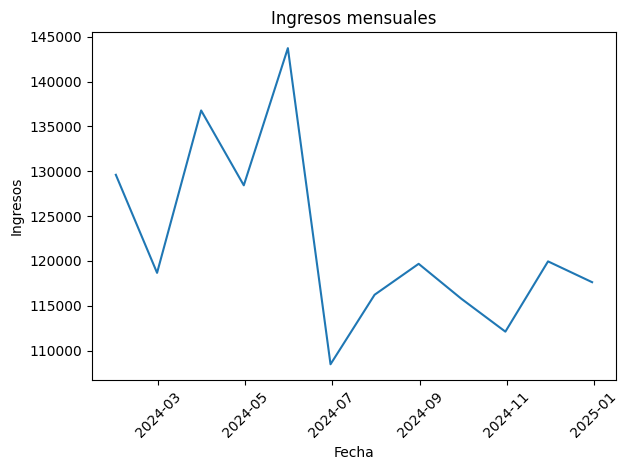

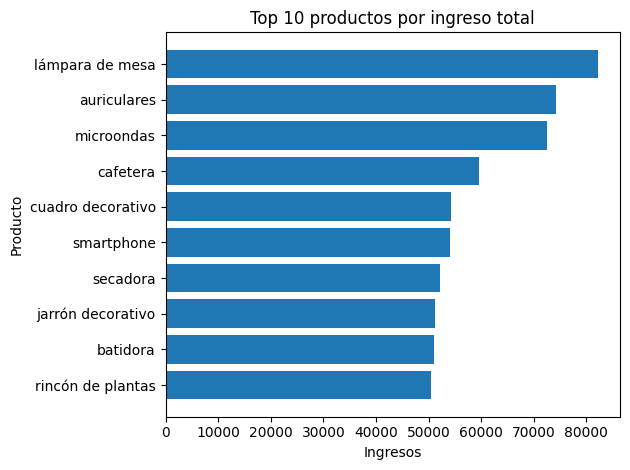

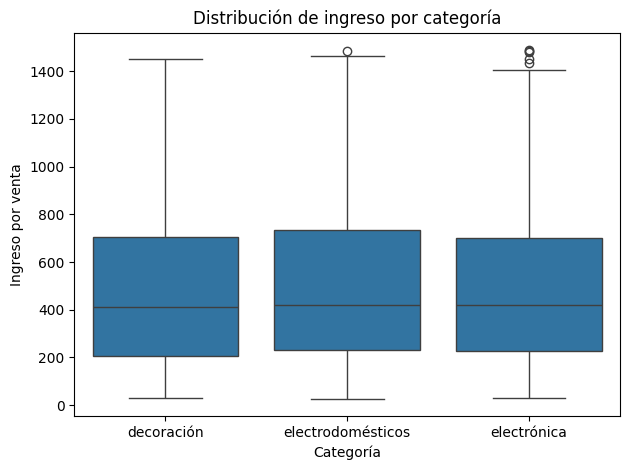

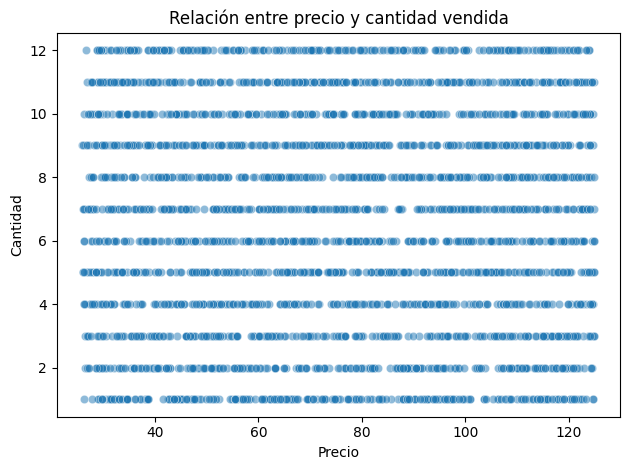

In [44]:
# Ventas mensuales
import matplotlib.pyplot as plt
import seaborn as sns

# Ingresos mensuales
ventas_mensual = (
    ventas_clean
    .set_index("fecha_venta")
    .resample("M")["ingreso"]
    .sum()
    .reset_index()
)

plt.figure()
plt.plot(ventas_mensual["fecha_venta"], ventas_mensual["ingreso"])
plt.title("Ingresos mensuales")
plt.xlabel("Fecha")
plt.ylabel("Ingresos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Top 10 productos por ingreso (barras)
top_prod = (
    ventas_clean
    .groupby("producto", as_index=False)
    .agg(ingreso_total=("ingreso", "sum"))
    .sort_values("ingreso_total", ascending=False)
    .head(10)
)

plt.figure()
plt.barh(top_prod["producto"], top_prod["ingreso_total"])
plt.title("Top 10 productos por ingreso total")
plt.xlabel("Ingresos")
plt.ylabel("Producto")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Boxplot de ingreso por categoría (Seaborn)
plt.figure()
sns.boxplot(data=ventas_clean, x="categoria", y="ingreso")
plt.title("Distribución de ingreso por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ingreso por venta")
plt.tight_layout()
plt.show()

#Scatter precio vs cantidad (Seaborn)
plt.figure()
sns.scatterplot(data=ventas_clean, x="precio", y="cantidad", alpha=0.5)
plt.title("Relación entre precio y cantidad vendida")
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()



12) Visualización interactiva con Plotly

A continuación construyo un gráfico interactivo con Plotly para explorar los ingresos mensuales y filtrar por categoría de producto.

In [45]:
import plotly.express as px

# Ingresos mensuales por categoría
ventas_mensual_cat = (
    ventas_clean
    .groupby([pd.Grouper(key="fecha_venta", freq="M"), "categoria"])
    .agg(ingreso_total=("ingreso", "sum"))
    .reset_index()
)

fig = px.line(
    ventas_mensual_cat,
    x="fecha_venta",
    y="ingreso_total",
    color="categoria",
    title="Ingresos mensuales por categoría (interactivo)",
    labels={
        "fecha_venta": "Fecha",
        "ingreso_total": "Ingresos",
        "categoria": "Categoría"
    }
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


/tmp/ipython-input-4038066332.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key="fecha_venta", freq="M"), "categoria"])


13) Conclusiones

El análisis completo de ventas, marketing y categorías permite llegar a los siguientes puntos clave:

Los ingresos se concentran principalmente en las categorías con mayor volumen de operaciones, lo que muestra un comportamiento consistente entre demanda y facturación.

Los productos con mayor ingreso total son aquellos que combinan precio estable y alta cantidad vendida, lo que refuerza la importancia de monitorear ambos factores en conjunto.

La dispersión de ingresos entre categorías evidencia diferencias claras en el rendimiento, lo cual permite identificar segmentos más volátiles y otros más previsibles.

Las campañas de marketing alcanzan un porcentaje significativo de las ventas y muestran impacto especialmente en productos de alta rotación. Entre los canales utilizados, algunos aportan ingresos considerablemente mayores, lo que sugiere una eficiencia desigual en la inversión publicitaria.

La correlación entre precio y cantidad vendida es limitada, lo que indica que el precio no es el principal impulsor de volumen en la mayoría de los productos; otros factores como la categoría y la promoción tienen mayor peso.

En función de estos resultados, las recomendaciones para SynthData son:

Concentrar campañas y presupuesto en los productos y categorías que ya muestran aporte fuerte a los ingresos, para maximizar retorno.

Revisar la estructura de precios en productos con baja rotación pero alto precio relativo, donde existe margen para optimizar el desempeño.

Redistribuir la inversión publicitaria hacia los canales con mejor rendimiento comprobado, reduciendo esfuerzos en aquellos que aportan bajo impacto.

Monitorear periódicamente las correlaciones y el desempeño por categoría, ya que son indicadores tempranos de cambios en el comportamiento del mercado.

Estas conclusiones proporcionan una hoja de ruta clara para tomar decisiones basadas en datos y mejorar la eficiencia comercial.



Anexo

Archivos utilizados en el proyecto:

ventas.csv — Dataset original de ventas.

clientes.csv — Dataset original de clientes.

marketing.csv — Dataset original de campañas marketing.

ventas_clean.csv, clientes_clean.csv, marketing_clean.csv — Versiones limpias utilizadas para el análisis.

Notebook del proyecto — https://colab.research.google.com/drive/1MQgbv1fJFNYmkDq6zhVGhP6Lxc7uMd7_?usp=drive_link

Repositorio GitHub: https://github.com/Maurodj78/EntregaFinalCienciaDeDatos-